# Hotel price in Las Vegas (EDA, Inference, and Prediction) - Candice Zhao 


## Stages of the project

1. Importing and loading 
    * Load the dataset as `data`
 
 
2. Data Wrangling
    * Check the data types and transform `searchdt`, `startdt` and `enddt` to datetime
    * Add new columns to the `data` dataframes: 
        - `advance_days`: days between the search_date and startdt
        - `stay_days`: days the customer stays
        - `weekday`: the day of the week for search_date (Monday=0, Sunday=6)
        - `month_s`: which month the stay starts
        - `month_e`: which month the stay ends
        - `day_s`: which day the stay starts
        - `day_e`: which day the stay ends
        - `year_s`: which year the stay starts
        - `year_e`: which year the stay ends
  

3. Exploratory Data Analysis 
    * Hotel stats summary
    * Price data summary
    * Search date
    * Days in advance 
    * Month/Day/Year of the trip
  
  
4. Data visualization
    * Subplot on hotel_id, hotel_stars
    * Histogram for each variable
  
  
5. Data analysis: when to book for a good deal 
    * Mean and median price grouped by `hotel_stars`
    * Median price grouped by `advance_days`
    * Median price grouped by 3-star, 4-star and 5-star hotel respectively
    * Hypothesis testing 


6. Hotel price prediction
    * Heatmap
    * scatterplot
    * Model 
        * Dummy variables for `hotel_stars`
        * Linear regression
        * Random forest
    

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import ttest_ind
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import metrics

## Import and Load data

In [90]:
# Load the Kayak Las Vegas Hotel raw data 
data = pd.read_csv('las_vegas_hotels.csv')
data

,search_date,startdt,enddt,hotel_id,hotel_stars,price
0,2021-06-29,2021-07-07,2021-07-11,24432,5.0,555.0
1,2021-06-12,2021-07-05,2021-07-09,24432,5.0,267.0
2,2021-06-06,2021-07-29,2021-08-01,24432,5.0,318.0
3,2021-06-21,2021-06-26,2021-07-02,24432,5.0,362.0
4,2021-06-29,2021-08-23,2021-08-25,24432,5.0,403.0
...,...,...,...,...,...,...
98204,2021-06-26,2021-09-04,2021-09-07,4367210,4.0,195.0
98205,2021-06-18,2021-07-18,2021-07-21,4367210,4.0,97.0
98206,2021-06-28,2021-08-22,2021-08-27,4367210,4.0,87.0
98207,2021-06-30,2021-12-09,2021-12-13,4367210,4.0,138.0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98209 entries, 0 to 98208
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   search_date  98209 non-null  object 
 1   startdt      98209 non-null  object 
 2   enddt        98209 non-null  object 
 3   hotel_id     98209 non-null  int64  
 4   hotel_stars  98209 non-null  float64
 5   price        98209 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.5+ MB


## Cleaning and adding new variables

In [165]:
# convert data type from object to datetime
data['search_date']=pd.to_datetime(data['search_date'])
data['startdt']=pd.to_datetime(data['startdt'])
data['enddt']=pd.to_datetime(data['enddt'])
data['advance_days'] = (data['startdt']- data['search_date']).dt.days
data['stay_days'] = (data['enddt']- data['startdt']).dt.days
data.dtypes

search_date     datetime64[ns]
startdt         datetime64[ns]
enddt           datetime64[ns]
hotel_id                 int64
hotel_stars            float64
price                  float64
advance_days             int64
weekday                  int64
month_s                  int64
month_e                  int64
day_s                    int64
day_e                    int64
year_s                   int64
year_e                   int64
stay_days                int64
dtype: object

In [166]:
# get the day of the week for search_date. The day of the week with Monday=0, Sunday=6.
data['weekday'] = data['search_date'].dt.dayofweek
data.head()

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e,stay_days
0,2021-06-29,2021-07-07,2021-07-11,24432,5.0,555.0,8,1,7,7,7,11,2021,2021,4
1,2021-06-12,2021-07-05,2021-07-09,24432,5.0,267.0,23,5,7,7,5,9,2021,2021,4
2,2021-06-06,2021-07-29,2021-08-01,24432,5.0,318.0,53,6,7,8,29,1,2021,2021,3
3,2021-06-21,2021-06-26,2021-07-02,24432,5.0,362.0,5,0,6,7,26,2,2021,2021,6
4,2021-06-29,2021-08-23,2021-08-25,24432,5.0,403.0,55,1,8,8,23,25,2021,2021,2


In [167]:
# get the month, day, year for the trip
data['month_s'] = data['startdt'].dt.month
data['month_e'] = data['enddt'].dt.month

data['day_s'] = data['startdt'].dt.day
data['day_e'] = data['enddt'].dt.day

data['year_s'] = data['startdt'].dt.year
data['year_e'] = data['enddt'].dt.year

data

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e,stay_days
0,2021-06-29,2021-07-07,2021-07-11,24432,5.0,555.0,8,1,7,7,7,11,2021,2021,4
1,2021-06-12,2021-07-05,2021-07-09,24432,5.0,267.0,23,5,7,7,5,9,2021,2021,4
2,2021-06-06,2021-07-29,2021-08-01,24432,5.0,318.0,53,6,7,8,29,1,2021,2021,3
3,2021-06-21,2021-06-26,2021-07-02,24432,5.0,362.0,5,0,6,7,26,2,2021,2021,6
4,2021-06-29,2021-08-23,2021-08-25,24432,5.0,403.0,55,1,8,8,23,25,2021,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98204,2021-06-26,2021-09-04,2021-09-07,4367210,4.0,195.0,70,5,9,9,4,7,2021,2021,3
98205,2021-06-18,2021-07-18,2021-07-21,4367210,4.0,97.0,30,4,7,7,18,21,2021,2021,3
98206,2021-06-28,2021-08-22,2021-08-27,4367210,4.0,87.0,55,0,8,8,22,27,2021,2021,5
98207,2021-06-30,2021-12-09,2021-12-13,4367210,4.0,138.0,162,2,12,12,9,13,2021,2021,4


In [168]:
data.dtypes

search_date     datetime64[ns]
startdt         datetime64[ns]
enddt           datetime64[ns]
hotel_id                 int64
hotel_stars            float64
price                  float64
advance_days             int64
weekday                  int64
month_s                  int64
month_e                  int64
day_s                    int64
day_e                    int64
year_s                   int64
year_e                   int64
stay_days                int64
dtype: object

## EDA

### General data information

In [169]:
data.describe()

,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e,stay_days
count,9.820900e+04,98209.000000,98209.000000,98209.000000,98209.000000,98209.000000,98209.000000,98209.00000,98209.000000,98209.0,98209.000000,98209.000000
mean,4.623634e+05,3.989492,238.673431,38.963832,2.736918,7.295380,7.375088,15.30655,15.695089,2021.0,2021.000112,2.857905
std,1.058829e+06,0.733188,163.892242,40.787721,1.950099,1.370036,1.382685,8.81050,8.783179,0.0,0.010583,1.833844
min,2.443200e+04,3.000000,13.000000,0.000000,0.000000,6.000000,1.000000,1.00000,1.000000,2021.0,2021.000000,1.000000
25%,6.281200e+04,3.000000,128.000000,7.000000,1.000000,6.000000,6.000000,8.00000,8.000000,2021.0,2021.000000,2.000000
50%,6.292200e+04,4.000000,202.000000,25.000000,2.000000,7.000000,7.000000,16.00000,16.000000,2021.0,2021.000000,3.000000
75%,3.705280e+05,5.000000,313.000000,58.000000,4.000000,8.000000,8.000000,23.00000,23.000000,2021.0,2021.000000,3.000000
max,4.367210e+06,5.000000,10774.000000,180.000000,6.000000,12.000000,12.000000,31.00000,31.000000,2021.0,2022.000000,79.000000


### Hotel summary stats

In [97]:
# number of hotels in the dataset
data['hotel_id'].nunique()

30

In [98]:
# number of reservations for each hotel
data['hotel_id'].value_counts()

370528     6093
62828      5031
129360     5008
27626      4995
701776     4719
62812      4507
417912     4370
62914      4094
30960      4066
62944      3861
4261654    3637
62806      3581
203434     3537
683828     3521
62808      3478
134818     3399
62862      3322
4367210    3058
28748      2991
62922      2973
397460     2744
30594      2122
62826      2069
62858      1976
62892      1937
304896     1735
62904      1672
62852      1423
258364     1388
24432       902
Name: hotel_id, dtype: int64

In [99]:
# hotel stars 
data['hotel_stars'].value_counts(normalize = True)

4.0    0.462330
3.0    0.274089
5.0    0.263581
Name: hotel_stars, dtype: float64

In [100]:
# convert hotel_id value_counts to a dataframe for information 
counts = data['hotel_id'].value_counts()
hotel_counts = pd.DataFrame(counts)
hotel_counts = hotel_counts.reset_index()
hotel_counts.columns=['hotel_id','reservations']
hotel_counts

,hotel_id,reservations
0,370528,6093
1,62828,5031
2,129360,5008
3,27626,4995
4,701776,4719
5,62812,4507
6,417912,4370
7,62914,4094
8,30960,4066
9,62944,3861


In [101]:
# hotel id with hotel starts infomation, number of reservations, and market share of each hotel
hotel_info = data[['hotel_id', 'hotel_stars']].drop_duplicates().sort_values('hotel_stars').reset_index(drop = True)
hotel_info = hotel_info.merge(hotel_counts, on ='hotel_id',how='left')
hotel_info['percentage'] = 100*hotel_info['reservations']/hotel_info['reservations'].sum()
hotel_info = hotel_info.sort_values(by=['percentage','hotel_stars','hotel_id'], ascending=False)
display(hotel_info)

,hotel_id,hotel_stars,reservations,percentage
24,370528,5.0,6093,6.204116
5,62828,3.0,5031,5.122748
12,129360,4.0,5008,5.099329
1,27626,3.0,4995,5.086092
28,701776,5.0,4719,4.805059
18,62812,4.0,4507,4.589192
26,417912,5.0,4370,4.449694
22,62914,4.0,4094,4.168661
20,30960,4.0,4066,4.140150
13,62944,4.0,3861,3.931412


### Price data 

In [102]:
data['price'].value_counts()

129.0     1128
155.0      808
70.0       592
136.0      577
145.0      559
          ... 
948.0        1
957.0        1
7983.0       1
913.0        1
901.0        1
Name: price, Length: 970, dtype: int64

In [103]:
data['price'].describe()

count    98209.000000
mean       238.673431
std        163.892242
min         13.000000
25%        128.000000
50%        202.000000
75%        313.000000
max      10774.000000
Name: price, dtype: float64

In [104]:
# hotel with price lower than $1000 per night
hotel_econ = data[data['price'] < 1000]
hotel_econ.shape

(98133, 14)

Text(0.5, 1.0, 'Distribution of Hotel price under $1000 per night')

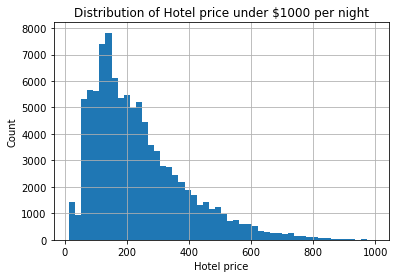

In [105]:
hotel_econ.price.hist(bins=50)
plt.xlabel('Hotel price')
plt.ylabel('Count')
plt.title('Distribution of Hotel price under $1000 per night')

In [106]:
hotel_high = data[(data['price'] > 1000) & (data['price'] < 7000)]
hotel_high.head()

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e
2287,2021-06-26,2021-07-09,2021-07-10,62806,4.0,1240.0,13 days,5,7,7,9,10,2021,2021
5933,2021-06-18,2021-06-30,2021-07-30,62914,4.0,1333.0,12 days,4,6,7,30,30,2021,2021
5934,2021-06-18,2021-06-30,2021-07-30,62914,4.0,1333.0,12 days,4,6,7,30,30,2021,2021
5935,2021-06-18,2021-06-30,2021-07-30,62914,4.0,1333.0,12 days,4,6,7,30,30,2021,2021
5936,2021-06-18,2021-06-30,2021-07-30,62914,4.0,1333.0,12 days,4,6,7,30,30,2021,2021


Text(0, 0.5, 'Price ($) per night')

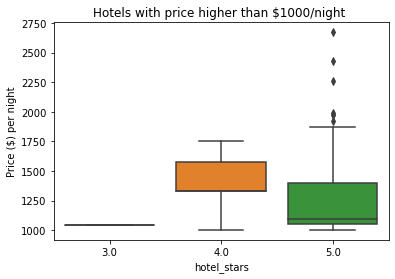

In [107]:
sns.boxplot(x='hotel_stars', y='price', data=hotel_high).set(title='Hotels with price higher than $1000/night ')
plt.ylabel('Price ($) per night')

In [108]:
# filter hotel price more than $7000 per night 
hotel_lux = data[data['price'] > 7000]
hotel_lux

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e
22005,2021-06-20,2021-06-26,2021-06-27,397460,5.0,7993.0,6 days,6,6,6,26,27,2021,2021
67295,2021-06-25,2021-07-03,2021-07-04,397460,5.0,8097.0,8 days,4,7,7,3,4,2021,2021
71245,2021-06-18,2021-06-25,2021-06-27,397460,5.0,10774.0,7 days,4,6,6,25,27,2021,2021
83484,2021-06-22,2021-06-26,2021-06-27,397460,5.0,7983.0,4 days,1,6,6,26,27,2021,2021


In [109]:
# check hotel_id = 397460
data[data['hotel_id'] ==397460].sort_values(by='price')

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e
71222,2021-06-05,2021-06-06,2021-06-07,397460,5.0,122.0,1 days,5,6,6,6,7,2021,2021
67337,2021-06-03,2021-06-06,2021-06-07,397460,5.0,122.0,3 days,3,6,6,6,7,2021,2021
71323,2021-06-03,2021-06-06,2021-06-07,397460,5.0,122.0,3 days,3,6,6,6,7,2021,2021
34413,2021-06-08,2021-06-08,2021-06-09,397460,5.0,122.0,0 days,1,6,6,8,9,2021,2021
9613,2021-06-08,2021-06-09,2021-06-10,397460,5.0,122.0,1 days,1,6,6,9,10,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22010,2021-06-30,2021-07-02,2021-07-06,397460,5.0,1973.0,2 days,2,7,7,2,6,2021,2021
83484,2021-06-22,2021-06-26,2021-06-27,397460,5.0,7983.0,4 days,1,6,6,26,27,2021,2021
22005,2021-06-20,2021-06-26,2021-06-27,397460,5.0,7993.0,6 days,6,6,6,26,27,2021,2021
67295,2021-06-25,2021-07-03,2021-07-04,397460,5.0,8097.0,8 days,4,7,7,3,4,2021,2021


### Each hotel's price range 

In [110]:
# The highest pirce for each hotel
hotel_price = data.groupby('hotel_id').agg({'price':['min', 'median','max']})
hotel_price = hotel_price.reset_index()
hotel_price.columns=['hotel_id','price_min','price_median','price_max']
hotel_price.head()

,hotel_id,price_min,price_median,price_max
0,24432,60.0,405.0,2426.0
1,27626,16.0,114.0,671.0
2,28748,63.0,173.0,622.0
3,30594,45.0,175.0,1755.0
4,30960,98.0,291.0,939.0


In [111]:
hotel_info = hotel_info.merge(hotel_price, on = 'hotel_id', how='left')
hotel_info.head()

,hotel_id,hotel_stars,reservations,percentage,price_min,price_median,price_max
0,370528,5.0,6093,6.204116,82.0,240.0,1423.0
1,62828,3.0,5031,5.122748,13.0,106.0,439.0
2,129360,4.0,5008,5.099329,67.0,155.0,782.0
3,27626,3.0,4995,5.086092,16.0,114.0,671.0
4,701776,5.0,4719,4.805059,142.0,407.0,2671.0


### Average price by hotel stars 

In [112]:
#Calculate the average price by hotel stars
stars_avg_price = data.groupby('hotel_stars')['price'].mean()
stars_avg_price.head()

hotel_stars
3.0    147.133628
4.0    222.191455
5.0    362.772657
Name: price, dtype: float64

<AxesSubplot:xlabel='hotel_stars'>

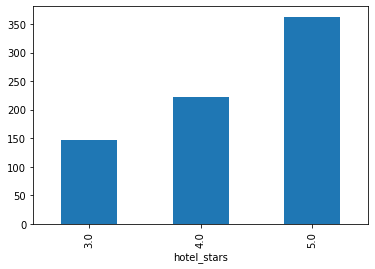

In [113]:
stars_avg_price.plot.bar()

### Search date

In [114]:
data['search_date'].value_counts()

2021-06-15    3803
2021-06-29    3761
2021-06-16    3738
2021-06-21    3648
2021-06-28    3636
2021-06-08    3630
2021-06-02    3613
2021-06-24    3608
2021-06-09    3586
2021-06-23    3549
2021-06-30    3473
2021-06-17    3415
2021-06-14    3381
2021-06-22    3374
2021-06-01    3371
2021-06-07    3356
2021-06-03    3328
2021-06-27    3261
2021-06-25    3126
2021-06-26    3072
2021-06-10    3034
2021-06-18    3002
2021-06-20    2968
2021-06-06    2951
2021-06-04    2862
2021-06-13    2814
2021-06-19    2766
2021-06-11    2751
2021-06-05    2697
2021-06-12    2635
Name: search_date, dtype: int64

[Text(0.5, 1.0, 'Searches per day')]

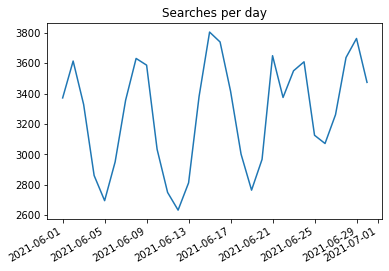

In [115]:
# line plot of searching in June
data['search_date'].value_counts().plot.line().set(title='Searches per day')

In [116]:
data['weekday'].value_counts()

2    17959
1    17939
0    14021
3    13385
6    11994
4    11741
5    11170
Name: weekday, dtype: int64

## Days in advance

In [117]:
data['advance_days'].value_counts(normalize = True)

0 days      0.061899
1 days      0.051462
4 days      0.029437
3 days      0.028500
2 days      0.028439
              ...   
162 days    0.000448
176 days    0.000417
173 days    0.000397
178 days    0.000377
160 days    0.000336
Name: advance_days, Length: 181, dtype: float64

<AxesSubplot:xlabel='Days in advance', ylabel='# of reservations'>

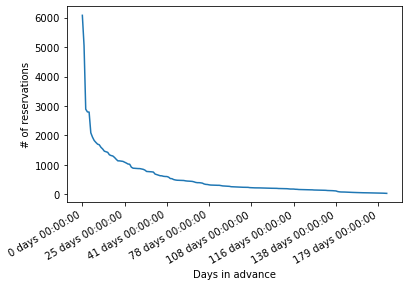

In [118]:
data['advance_days'].value_counts().plot(kind = 'line',xlabel='Days in advance',ylabel='# of reservations')

## Month / Day / Year of the trip

In [119]:
data['month_s'].value_counts()

7     34015
6     32934
8     14007
9      8032
10     5704
11     2825
12      692
Name: month_s, dtype: int64

<AxesSubplot:>

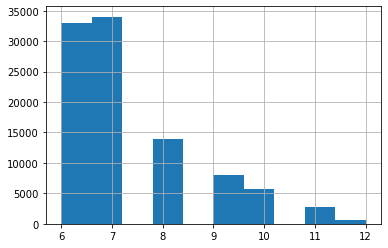

In [120]:
data.month_s.hist()

<AxesSubplot:>

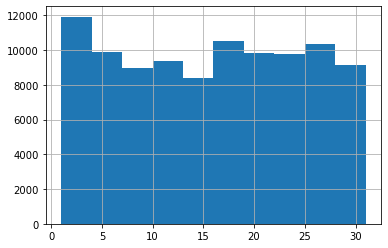

In [121]:
data.day_s.hist()

In [122]:
data.year_s.value_counts()

2021    98209
Name: year_s, dtype: int64

In [123]:
data.year_e.value_counts()

2021    98198
2022       11
Name: year_e, dtype: int64

## Data visualization

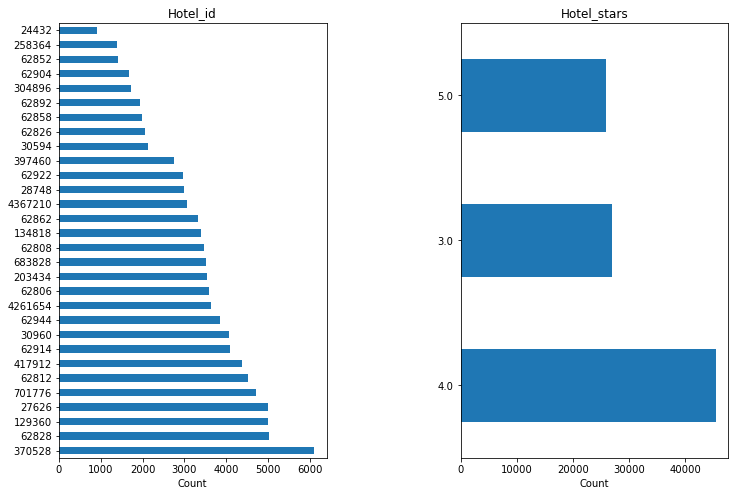

In [124]:
#Create two subplots on hotel_id and hotel_stars
fig, ax = plt.subplots(1, 2, figsize=(12,8))
data.hotel_id.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Hotel_id')
ax[0].set_xlabel('Count')

data.hotel_stars.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Hotel_stars')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);

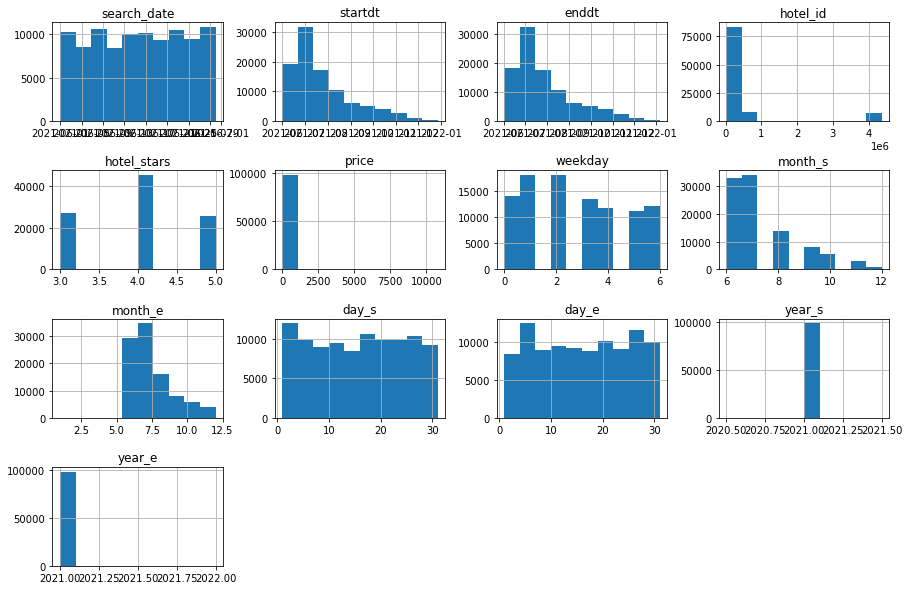

In [125]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## Hotel price analysis - when to book for a good deal

In [126]:
data

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e
0,2021-06-29,2021-07-07,2021-07-11,24432,5.0,555.0,8 days,1,7,7,7,11,2021,2021
1,2021-06-12,2021-07-05,2021-07-09,24432,5.0,267.0,23 days,5,7,7,5,9,2021,2021
2,2021-06-06,2021-07-29,2021-08-01,24432,5.0,318.0,53 days,6,7,8,29,1,2021,2021
3,2021-06-21,2021-06-26,2021-07-02,24432,5.0,362.0,5 days,0,6,7,26,2,2021,2021
4,2021-06-29,2021-08-23,2021-08-25,24432,5.0,403.0,55 days,1,8,8,23,25,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98204,2021-06-26,2021-09-04,2021-09-07,4367210,4.0,195.0,70 days,5,9,9,4,7,2021,2021
98205,2021-06-18,2021-07-18,2021-07-21,4367210,4.0,97.0,30 days,4,7,7,18,21,2021,2021
98206,2021-06-28,2021-08-22,2021-08-27,4367210,4.0,87.0,55 days,0,8,8,22,27,2021,2021
98207,2021-06-30,2021-12-09,2021-12-13,4367210,4.0,138.0,162 days,2,12,12,9,13,2021,2021


In [127]:
# mean price by hotel_stars
data.groupby('hotel_stars')['price'].mean()

hotel_stars
3.0    147.133628
4.0    222.191455
5.0    362.772657
Name: price, dtype: float64

In [128]:
# median price by hotel_stars
data.groupby('hotel_stars')['price'].median()

hotel_stars
3.0    130.0
4.0    194.0
5.0    332.0
Name: price, dtype: float64

In [129]:
# for each hotel's lowest price, how many days in advance did the customers make the reservation
hotel_min = data.iloc[data.groupby('hotel_id')['price'].idxmin()]
hotel_min
hotel_min['advance_days'].value_counts()

0 days      6
5 days      3
3 days      2
1 days      2
8 days      2
27 days     1
174 days    1
9 days      1
40 days     1
15 days     1
21 days     1
52 days     1
16 days     1
2 days      1
25 days     1
12 days     1
23 days     1
26 days     1
32 days     1
167 days    1
Name: advance_days, dtype: int64

In [130]:
# save the median price grouped by advance_days to a dataframe for plotting 
hotel_book = data.groupby('advance_days')['price'].median().to_frame()

[Text(0.5, 1.0, 'Median Price Changes')]

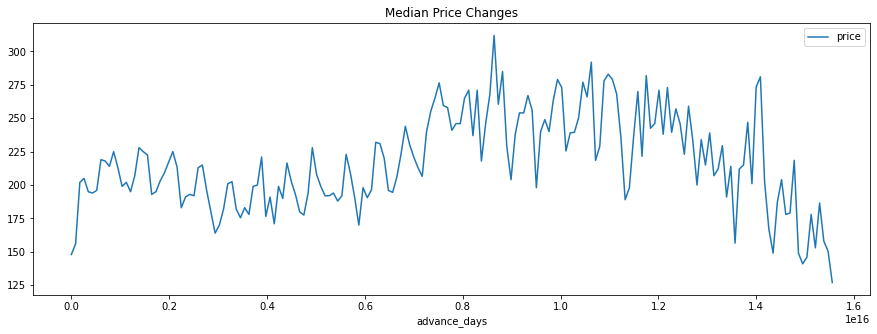

In [131]:
plt.figure(figsize=(15,5))
sns.lineplot(data=hotel_book).set(title='Median Price Changes')

In [132]:
# sort the median price in ascending order for the corresponding advance_days
hotel_book.sort_values(by='price').head(20)

,price
advance_days,
180 days,127.0
173 days,141.0
174 days,146.0
0 days,148.0
166 days,149.0
172 days,149.0
179 days,150.5
176 days,153.0
1 days,156.0


In [133]:
# for 3-star hotels
hotel3 = data[(data.hotel_stars == 3)]
hotel3_book = hotel3.groupby('advance_days')['price'].median().to_frame()
hotel3_book.sort_values(by='price').head(10)

,price
advance_days,
167 days,59.0
171 days,59.5
173 days,68.5
174 days,70.0
168 days,70.0
169 days,73.0
162 days,78.0
157 days,78.0
180 days,80.0


[Text(0.5, 1.0, '3-Star Hotel Price (median)')]

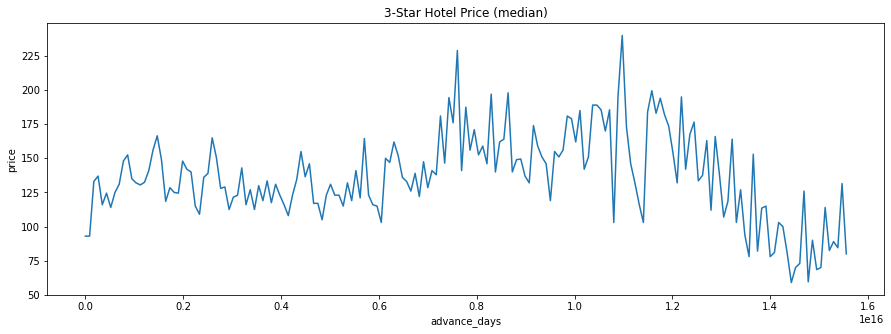

In [134]:
plt.figure(figsize=(15,5))
sns.lineplot(x='advance_days',y='price',data=hotel3_book).set(title='3-Star Hotel Price (median)')

In [135]:
# for 4-star hotel
hotel4 = data[(data.hotel_stars == 4)]
hotel4_book = hotel4.groupby('advance_days')['price'].median().to_frame()
hotel4_book.sort_values(by='price').head(10)

,price
advance_days,
180 days,123.5
174 days,134.0
165 days,142.0
179 days,143.0
170 days,147.0
166 days,149.0
0 days,155.0
1 days,156.0
47 days,156.5


[Text(0.5, 1.0, '4-Star Hotel Price (median)')]

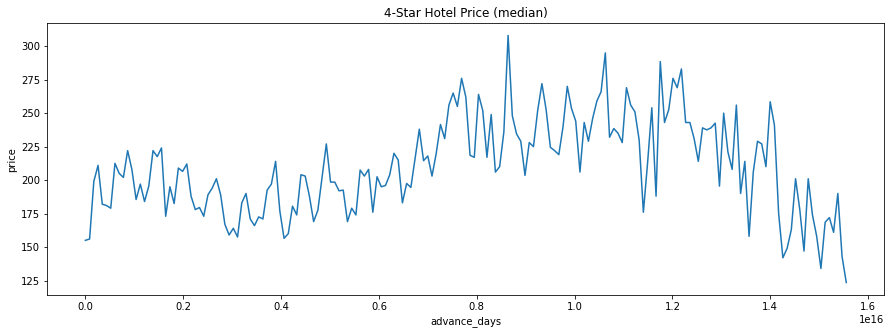

In [136]:
plt.figure(figsize=(15,5))
sns.lineplot(x='advance_days',y='price',data=hotel4_book).set(title='4-Star Hotel Price (median)')

In [137]:
hotel5 = data[(data.hotel_stars == 5)]
hotel5_book = hotel5.groupby('advance_days')['price'].median().to_frame()
hotel5_book.sort_values(by='price').head(10)

,price
advance_days,
178 days,186.5
175 days,191.0
167 days,218.5
165 days,224.0
179 days,224.0
180 days,231.0
156 days,243.0
0 days,246.0
154 days,250.0


[Text(0.5, 1.0, '5-Star Hotel Price (median)')]

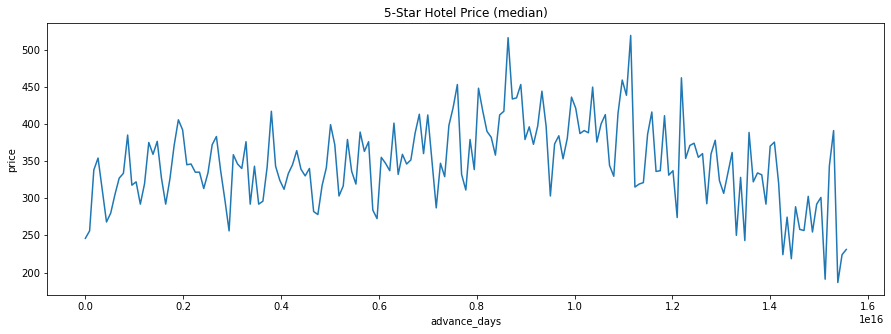

In [138]:
plt.figure(figsize=(15,5))
sns.lineplot(x='advance_days',y='price',data=hotel5_book).set(title='5-Star Hotel Price (median)')

In [142]:
data

,search_date,startdt,enddt,hotel_id,hotel_stars,price,advance_days,weekday,month_s,month_e,day_s,day_e,year_s,year_e
0,2021-06-29,2021-07-07,2021-07-11,24432,5.0,555.0,8 days,1,7,7,7,11,2021,2021
1,2021-06-12,2021-07-05,2021-07-09,24432,5.0,267.0,23 days,5,7,7,5,9,2021,2021
2,2021-06-06,2021-07-29,2021-08-01,24432,5.0,318.0,53 days,6,7,8,29,1,2021,2021
3,2021-06-21,2021-06-26,2021-07-02,24432,5.0,362.0,5 days,0,6,7,26,2,2021,2021
4,2021-06-29,2021-08-23,2021-08-25,24432,5.0,403.0,55 days,1,8,8,23,25,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98204,2021-06-26,2021-09-04,2021-09-07,4367210,4.0,195.0,70 days,5,9,9,4,7,2021,2021
98205,2021-06-18,2021-07-18,2021-07-21,4367210,4.0,97.0,30 days,4,7,7,18,21,2021,2021
98206,2021-06-28,2021-08-22,2021-08-27,4367210,4.0,87.0,55 days,0,8,8,22,27,2021,2021
98207,2021-06-30,2021-12-09,2021-12-13,4367210,4.0,138.0,162 days,2,12,12,9,13,2021,2021


In [154]:
# select 0 advance_days, 30 advance_days, 50 advance_days and 180 advance_days to test 
hotel_advance0 = data[(data.advance_days == 0)]
hotel_advance30 = data[(data.advance_days == 30)]
hotel_advance50 = data[(data.advance_days == 50)]
hotel_advance180 = data[(data.advance_days == 180)]

In [155]:
hotel_a0 = hotel_advance0['price']
hotel_a30 = hotel_advance30['price']
hotel_a50 = hotel_advance50['price']
hotel_a180 = hotel_advance180['price']

## T-test

**Test 1:** 

**H<sub>null</sub>**: For hotel price, booking 30 days in advance is the same as booking in 50 days in advance 

**H<sub>alternative</sub>**: The hotel price is not the same when booking 30 days and 50 days in advance

In [156]:
stat, p = ttest_ind(hotel_a30,hotel_a50)
print('t=%.3f, p=%.3f' % (stat, p))

t=3.151, p=0.002


Reject the null hypothesis. 50 days in advance is cheaper than 30 days in advance

**Test2:** 

**H<sub>null</sub>**: For hotel price, booking 0 days in advance is the same as booking in 50 days in advance 

**H<sub>alternative</sub>**: The hotel price is not the same when booking 0 days and 50 days in advance

In [157]:
stat, p = ttest_ind(hotel_a0,hotel_a50)
print('t=%.3f, p=%.3f' % (stat, p))

t=-9.516, p=0.000


Reject the null hypothesis. Booking on check-in day is cheaper than 50 days in advance 

**Test3:** 

**H<sub>null</sub>**: For hotel price, booking 50 days in advance is the same as booking in 180 days in advance 

**H<sub>alternative</sub>**: The hotel price is not the same when booking 50 days and 180 days in advance

In [158]:
stat, p = ttest_ind(hotel_a50,hotel_a180 )
print('t=%.3f, p=%.3f' % (stat, p))

t=2.622, p=0.009


Reject the null hypothesis. Booking 50 days in advance is expensive than 180 days in advance

**Test4:** 

**H<sub>null</sub>**: For hotel price, booking 0 days in advance is the same as booking in 180 days in advance 

**H<sub>alternative</sub>**: The hotel price is not the same when booking 0 days and 180 days in advance

In [159]:
stat, p = ttest_ind(hotel_a0,hotel_a180 )
print('t=%.3f, p=%.3f' % (stat, p))

t=0.237, p=0.812


Can't reject the null. No statistical evidence shows that the price on check-in day is different from the price of booking 180 days in advance.

**Summary notes**

Median price on the departure day is not statistically different from booking 180 days in advance

Planning half year ahead and making last minute travel are the most cost effective options.

As the graph and stats test shows, on the day of departure or approximately 180 days (~6 months) in advance are the cheapest time to book, average hotel prices in Las Vegas are at their lowest. 

In general, booking within 75 days ahead possibly put you in a relatively low prices range. Booking 50 days in advance would be cheaper than booking 30 days ahead. 

However, booking between 100 days to 125 days in advance seems to be the most expensive time to book. 

## Prediction

### Heatmap

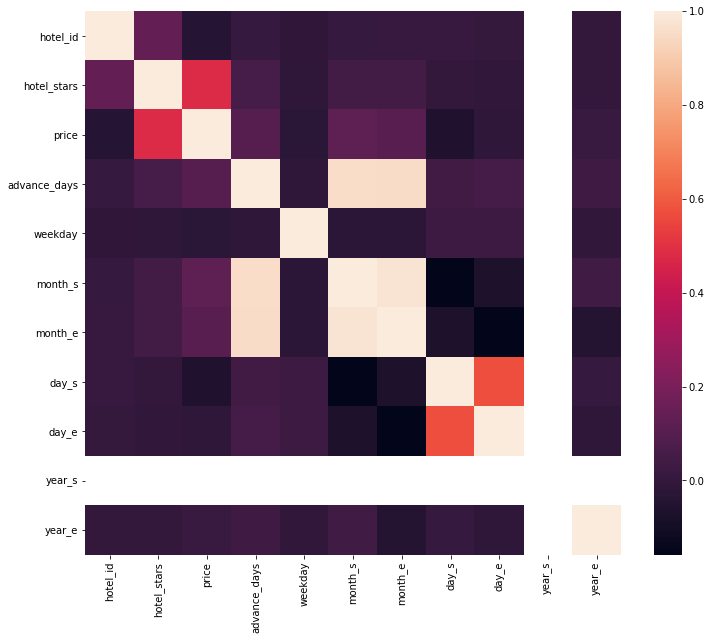

In [160]:
# show a seaborn heatmap of correlations
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr());

### Scatterplots of numeric features against hotel price

In [161]:
# drop 4 observation with the price higher than $5000 per night as outliers
data_corr = data[data.price < 5000]
data_corr.shape

(98205, 14)

In [174]:
# scatterplots of numeric features against hotel price
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'price', data=data_corr, alpha=0.5)
        ax.set(xlabel=col, ylabel='Hotel $/night')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [175]:
features = [x for x in data_corr.columns if x not in ['hotel_id', 'price']]

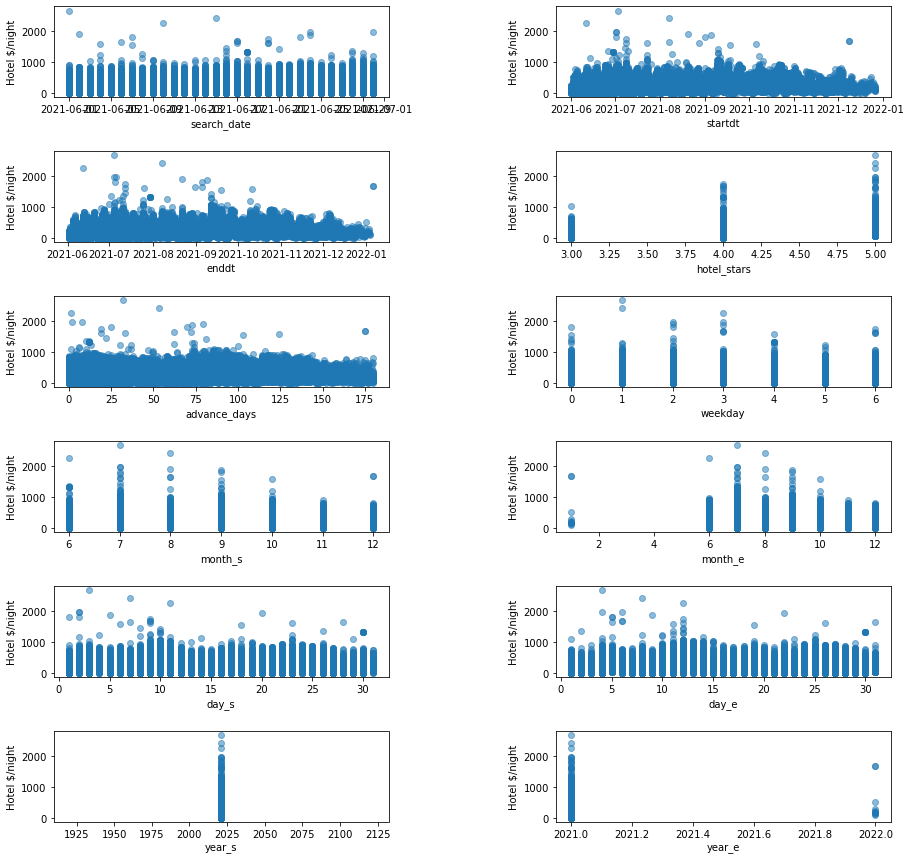

In [176]:
scatterplots(features, ncol=2, figsize=(15, 15))

### Preprocessing

In [177]:
# select variables for modelling as a new dataframe
df = data[['price','hotel_stars','advance_days','weekday','stay_days','month_s','month_e','day_s','day_e','year_s','year_e']]

# creat dummy variables for hotel stars
df.loc[:, 'star3']=0
df.loc[:, 'star4']=0
df.loc[:, 'star5']=0

df.loc[(df.hotel_stars==3), 'star3'] = 1
df.loc[(df.hotel_stars==4), 'star4'] = 1
df.loc[(df.hotel_stars==5), 'star5'] = 1

df = df.drop(columns='hotel_stars')
df.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,price,advance_days,weekday,stay_days,month_s,month_e,day_s,day_e,year_s,year_e,star3,star4,star5
0,555.0,8,1,4,7,7,7,11,2021,2021,0,0,1
1,267.0,23,5,4,7,7,5,9,2021,2021,0,0,1
2,318.0,53,6,3,7,8,29,1,2021,2021,0,0,1
3,362.0,5,0,6,6,7,26,2,2021,2021,0,0,1
4,403.0,55,1,2,8,8,23,25,2021,2021,0,0,1


### Split the dataset

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), 
                                                    df.price, test_size=0.3)

In [181]:
X_train.shape, X_test.shape

((68746, 12), (29463, 12))

In [182]:
y_train.shape, y_test.shape

((68746,), (29463,))

In [183]:
train_mean = y_train.mean()
train_mean

238.74878538387688

### Linear regression 

In [191]:
lm_s = LinearRegression().fit(X_train, y_train)

In [196]:
y_tr_pred_s = lm_s.predict(X_train)
y_te_pred_s = lm_s.predict(X_test)

In [197]:
r2_s = r2_score(y_train, y_tr_pred_s), r2_score(y_test, y_te_pred_s)
r2_s

(0.26456726561575195, 0.25379530161467345)

In [199]:
mean_absolute_error(y_train, y_tr_pred_s), mean_absolute_error(y_test, y_te_pred_s)

(99.46382661581963, 99.6365551378368)

In [200]:
mean_squared_error(y_train, y_tr_pred_s), mean_squared_error(y_test, y_te_pred_s)

(19431.72317612279, 20806.330897417633)

In [201]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [202]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [203]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [204]:
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.26456726561485666, 0.25379530161367325)

In [214]:
cv_results = cross_validate(lm, X_train, y_train, cv=5)
cv_scores = cv_results['test_score']
cv_scores

array([0.28308014, 0.28443653, 0.29377843, 0.21796998, 0.25567854])

### Random forest

In [215]:
rf = RandomForestRegressor(n_estimators=100, bootstrap = True, random_state=62)

In [216]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=62)

In [217]:
y_tr_pred_rf = rf.predict(X_train)
y_te_pred_rf = rf.predict(X_test)

In [218]:
r2_rf = r2_score(y_train, y_tr_pred_rf), r2_score(y_test, y_te_pred_rf)
r2_rf

(0.78235443136382, 0.5579175763465165)

In [219]:
cv_results_rf = cross_validate(rf, X_train, y_train, cv=5)
cv_scores_rf = cv_results_rf['test_score']
cv_scores_rf

array([0.62590717, 0.61930104, 0.60036491, 0.49064629, 0.5488388 ])

In [220]:
mse = metrics.mean_absolute_error(y_train, y_tr_pred_rf),metrics.mean_absolute_error(y_test, y_te_pred_rf)
mse

(43.96710937439221, 63.166053776331914)

In [221]:
mean_squared_error(y_train, y_tr_pred_rf), mean_squared_error(y_test, y_te_pred_rf)

(5750.6665701915845, 12326.528110007968)

In [222]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
11,star5,0.249591
0,advance_days,0.183853
6,day_e,0.164084
5,day_s,0.160907
1,weekday,0.061464
2,stay_days,0.056110
3,month_s,0.044878
4,month_e,0.035092
10,star4,0.023533
9,star3,0.020319


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred_rf)))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


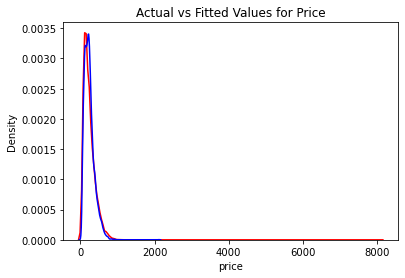

In [212]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_te_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()